In [5]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pylab import *
from sklearn import*
from sklearn.neural_network import MLPClassifier
import joblib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF

In [35]:
from sklearn_lvq import LgmlvqModel
from sklearn_lvq import RslvqModel

In [6]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
df_training =  pd.read_csv("training_set_v1_dr7.csv")
columnsNamesArr = df_training.columns.values
column_names = list(columnsNamesArr)
print(column_names[1:])

['ra', 'dec', 'g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'concentration_index', 'photo_z', 'frac_dev', 'host_galaxy', 'distance', 'axis_ratio', 'category', 'radius', 'magnitude', 'u_mag', 'g_mag', 'i_mag', 'r_mag', 'z_mag', 'link']


In [9]:
u, g, r, i, z = df_training['u_mag'], df_training['g_mag'], df_training['r_mag'], df_training['i_mag'], df_training['z_mag']
concentration_index = df_training['concentration_index']
frac_dev = df_training['frac_dev']
axis_ratio = df_training['axis_ratio']
photoz = df_training['photo_z']
category = df_training['category']
g_i, u_g, u_z, g_z, g_r = df_training['g-i'], df_training['u-g'], df_training['u-z'], df_training['g-z'], df_training['g-r']
magnitude = df_training['magnitude']
radius = df_training['radius']

In [10]:
features = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'concentration_index', 'photo_z', 'frac_dev','axis_ratio','radius', 'magnitude']
print(len(features))

11


In [11]:
# classification
classification = np.NaN*np.ones(len(photoz))
classification[category == 'Known galaxies'] = 1  
classification[category == 'Contaminant'] = 0 

# Unscaled data

In [12]:
X = df_training.loc[:,features].values
y = classification

In [13]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GP', GaussianProcessClassifier()))
models.append(('RF', RandomForestClassifier(max_depth=5, n_estimators=15, max_features=1)))
models.append(('ABC', AdaBoostClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring='recall')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# try neural network

LR: 0.225000 (0.025000)
LDA: 0.787500 (0.245904)
KNN: 0.537500 (0.198037)
CART: 0.787500 (0.143069)
NB: 0.875000 (0.125000)
SVM: 0.212500 (0.143069)
GP: 0.537500 (0.198037)
RF: 0.487500 (0.143069)
ABC: 0.787500 (0.143069)


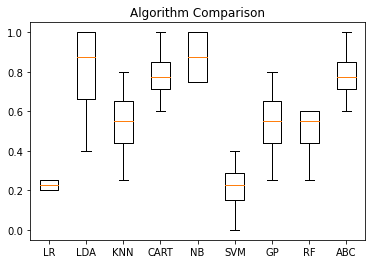

In [14]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [15]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X, y)
# filename = 'dr7_model_photometric.sav'
# joblib.dump(model, filename)
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)
predictions = model.predict(X)

In [16]:
# Evaluate predictions
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

1.0
[[145   0]
 [  0  18]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       145
         1.0       1.00      1.00      1.00        18

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163



In [17]:
plt.rcParams.update({'font.size': 20})

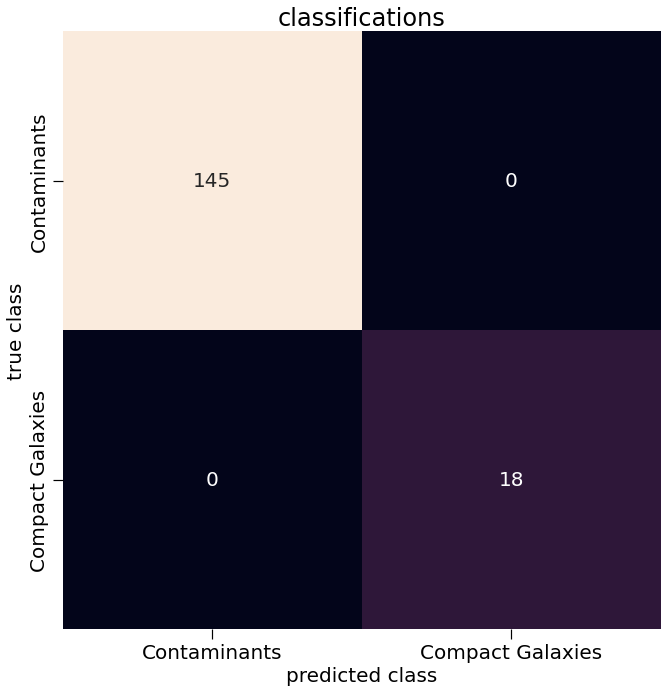

In [18]:
fig4 = plt.figure(figsize=(11,11))
g = sns.heatmap(confusion_matrix(y, predictions), square=True, annot=True, fmt="d", cbar=False, xticklabels=['Contaminants', 'Compact Galaxies'], yticklabels=['Contaminants', 'Compact Galaxies'])
g.set_yticklabels(labels=g.get_yticklabels(), va='center') # why is this hack necessary?
plt.xlabel('predicted class')
plt.ylabel('true class')
plt.title('classifications')
plt.tick_params('both', length=10, width=1.2, which='major', labelsize=20)

# Scaled data

In [20]:
scaler = StandardScaler()

In [21]:
X_scaled = scaler.fit_transform(X)

In [37]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GP', GaussianProcessClassifier()))
models.append(('RF', RandomForestClassifier(max_depth=5, n_estimators=15, max_features=1)))
models.append(('ABC', AdaBoostClassifier()))
models.append(('LGMLVQ', RslvqModel()))
# evaluate each model in turn
results_scaled = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
    cv_results_scaled = cross_val_score(model, X_scaled, y, cv=kfold, scoring='recall')
    results_scaled.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results_scaled.mean(), cv_results_scaled.std()))

LR: 0.887500 (0.113880)
LDA: 0.787500 (0.245904)
KNN: 0.612500 (0.089268)
CART: 0.787500 (0.143069)
NB: 0.750000 (0.306186)
SVM: 0.950000 (0.086603)
GP: 0.900000 (0.100000)
RF: 0.550000 (0.231840)
ABC: 0.787500 (0.143069)
LGMLVQ: 0.762500 (0.178098)


In [30]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn_lvq import LgmlvqModel
from sklearn_lvq.utils import plot2d

print(__doc__)

nb_ppc = 100
toy_label = np.append(np.zeros(nb_ppc), np.ones(nb_ppc), axis=0)

print('LGMLVQ:')
toy_data = np.append(
    np.random.multivariate_normal([0, 1], np.array([[5, -4], [-4, 6]]),
                                  size=nb_ppc),
    np.random.multivariate_normal([0, 0], np.array([[5, 4], [4, 6]]),
                                  size=nb_ppc), axis=0)
lgmlvq = LgmlvqModel()
lgmlvq.fit(X_scaled, y)
# plot2d(lgmlvq, toy_data, toy_label, 1, 'lgmlvq')

print('classification accuracy:', lgmlvq.score(toy_data, toy_label))
plt.show()

Automatically created module for IPython interactive environment
LGMLVQ:


ValueError: X has wrong number of features
found=11
expected=2

In [38]:
mlp = MLPClassifier(activation='relu', solver='lbfgs', max_iter=100000000000000)
# hidden_layer_sizes=(8,8,8)
mlp.fit(X,y)
# filename_1 = 'dr7_neuralnetwork_photometric.sav'
# joblib.dump(mlp, filename_1)
predict_train = mlp.predict(X_train)
predict_validation = mlp.predict(X_validation)
predict_final = mlp.predict(X)

In [39]:
print(confusion_matrix(Y_train,predict_train))
print(classification_report(Y_train,predict_train))

[[45  2]
 [ 3  6]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        47
         1.0       0.75      0.67      0.71         9

    accuracy                           0.91        56
   macro avg       0.84      0.81      0.83        56
weighted avg       0.91      0.91      0.91        56



In [40]:
print(confusion_matrix(y,predict_final))
print(classification_report(y,predict_final))

[[66  2]
 [ 4  8]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        68
         1.0       0.80      0.67      0.73        12

    accuracy                           0.93        80
   macro avg       0.87      0.82      0.84        80
weighted avg       0.92      0.93      0.92        80



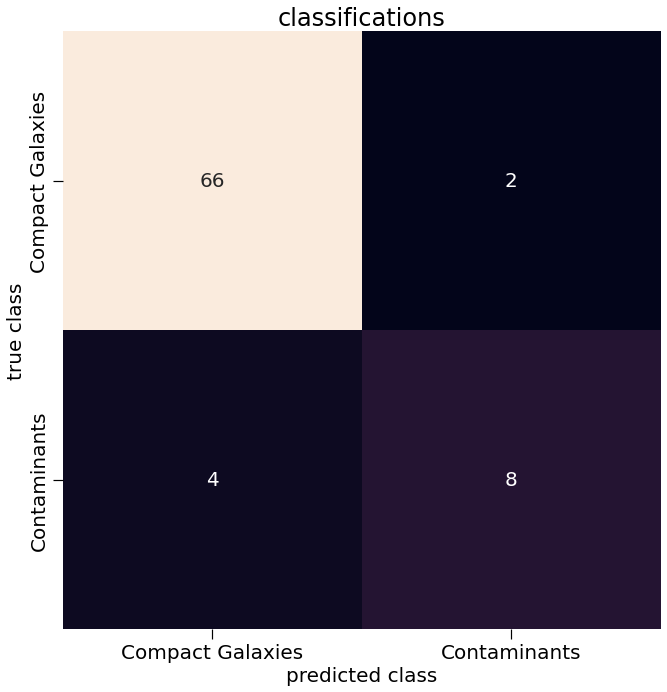

In [41]:
fig4 = plt.figure(figsize=(11,11))
g = sns.heatmap(confusion_matrix(y,predict_final), square=True, annot=True, fmt="d", cbar=False, xticklabels=['Compact Galaxies','Contaminants'], yticklabels=['Compact Galaxies','Contaminants'])
g.set_yticklabels(labels=g.get_yticklabels(), va='center') # why is this hack necessary?
plt.xlabel('predicted class')
plt.ylabel('true class')
plt.title('classifications')
plt.tick_params('both', length=10, width=1.2, which='major', labelsize=20)

make plot of mass of compact galaxy vs mass of host, most compact galaxies should have already been seen, so only look for few
this is for compact ellipticals

UCD could be 1 per galaxy.

liu UCD's add from there

perturb results using sdss errors and run simulations to augment data, also look at voting methods for machine learning.

stick with diff UCD and CE different plots.

In [68]:
clf1 = LogisticRegression(solver='liblinear', multi_class='ovr')
clf2 = LinearDiscriminantAnalysis()
clf3 = DecisionTreeClassifier()
clf4 = GaussianNB()
clf5 = MLPClassifier(activation='relu', solver='lbfgs', max_iter=100000)
clf6 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('lda', clf2), ('cart', clf3), ('mlp', clf5), ('nb', clf4)], voting='soft')
eclf1.fit(X, y)
eclf_predict = eclf1.predict(X)

filename = 'dr7_model_voting_2.sav'
joblib.dump(eclf1, filename)

['dr7_model_voting.sav']

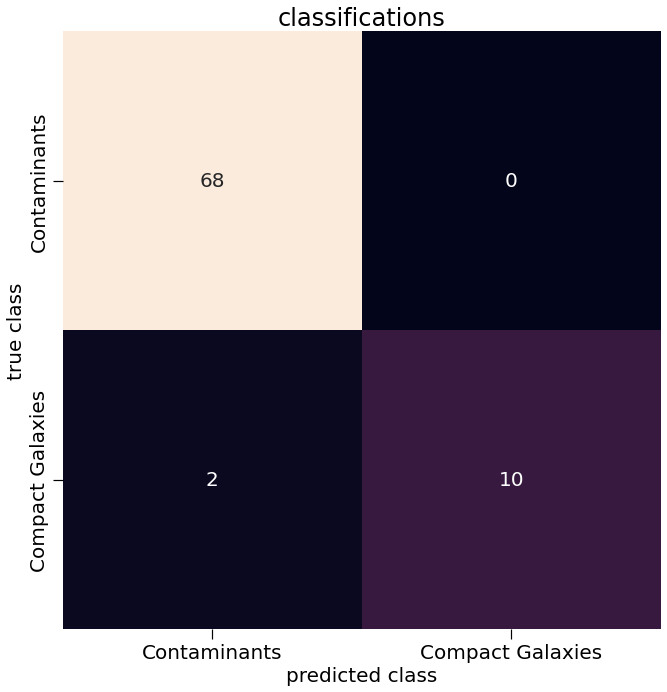

In [69]:
fig5 = plt.figure(figsize=(11,11))
g = sns.heatmap(confusion_matrix(y, eclf_predict), square=True, annot=True, fmt="d", cbar=False, xticklabels=['Contaminants', 'Compact Galaxies'], yticklabels=['Contaminants', 'Compact Galaxies'])
g.set_yticklabels(labels=g.get_yticklabels(), va='center') # why is this hack necessary?
plt.xlabel('predicted class')
plt.ylabel('true class')
plt.title('classifications')
plt.tick_params('both', length=10, width=1.2, which='major', labelsize=20)